In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
%matplotlib inline

# I give credit to Thinkful for allowing me to copy the data to do this drill.

In [2]:
tune = pd.DataFrame()
tune['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
tune['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
tune['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]
tune

,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120
5,197,9,110
6,294,29,80
7,382,22,100
8,102,10,105
9,264,24,60


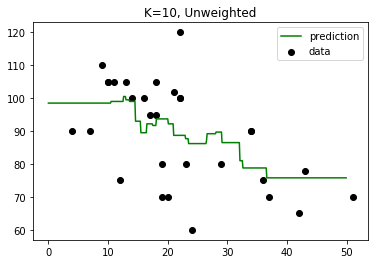

In [118]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(tune.loudness)
Y = tune.bpm
knn.fit(X, Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

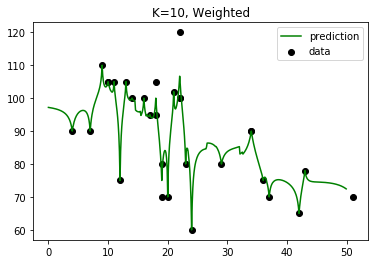

In [119]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(tune.loudness)
Y = tune.bpm
knn_w.fit(X, Y)

T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [120]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


# K=12

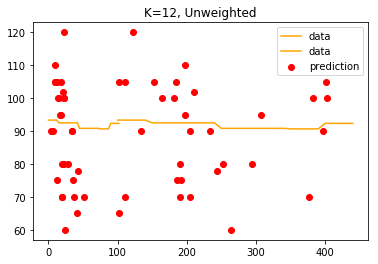

Unweighted Accuracy: -0.38 (+/- 0.63)


In [128]:
knn = neighbors.KNeighborsRegressor(n_neighbors=12)
X = np.array(tune[['duration','loudness']]) #Add the array to make the model better
Y = np.column_stack([tune.bpm,tune.bpm]) #http://www.michaeljgrogan.com/k-nearest-neighbors-classification-problems/ gave me this idea
knn.fit(X, Y)

Tx1 = np.arange(0, 105, 3)
Ty1 = np.arange(100, 450, 10)
T = np.column_stack([Tx1, Ty1])

Y_ = knn.predict(T)


plt.scatter(X, Y, c='red', label='prediction')

plt.plot(T, Y_, c='orange', label='data')
plt.legend()
plt.title('K=12, Unweighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


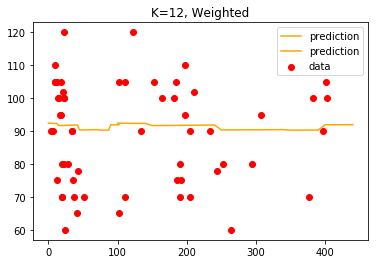

The weighted accuracy is: -0.25 (+/- 0.66).


In [137]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=12, weights='distance')
X = np.array(tune[['duration','loudness']]) #Added array to make the model better
knn_w.fit(X, Y)

Tx1 = np.arange(0, 105, 3)
Ty1 = np.arange(100, 450, 10)
T = np.column_stack([Tx1, Ty1])

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='red', label='data')
plt.plot(T, Y_, c='orange', label='prediction')
plt.legend()
plt.title('K=12, Weighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("The weighted accuracy is: %0.2f (+/- %0.2f)." % (score_w.mean(), score_w.std() * 2))

# K=14

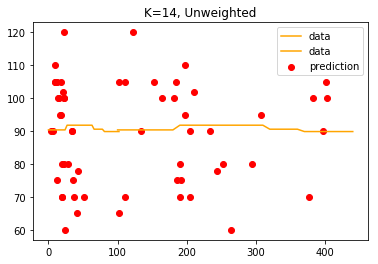

The unweighted accuracy is: -0.34 (+/- 0.75).


In [124]:
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
X = np.array(tune[['duration','loudness']]) #Add the array to make the model better
Y = np.column_stack([tune.bpm,tune.bpm]) #http://www.michaeljgrogan.com/k-nearest-neighbors-classification-problems/ gave me this idea
knn.fit(X, Y)

Tx1 = np.arange(0, 105, 3)
Ty1 = np.arange(100, 450, 10)
T = np.column_stack([Tx1, Ty1])

Y_ = knn.predict(T)


plt.scatter(X, Y, c='red', label='prediction')

plt.plot(T, Y_, c='orange', label='data')
plt.legend()
plt.title('K=14, Unweighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("The unweighted accuracy is: %0.2f (+/- %0.2f)." % (score.mean(), score.std() * 2))

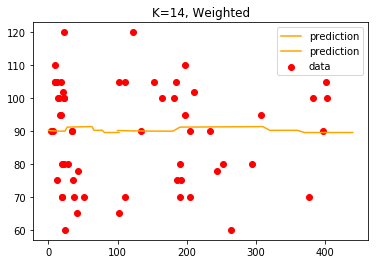

The weighted accuracy is: -0.23 (+/- 0.67).


In [143]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=14, weights='distance')
X = np.array(tune[['duration','loudness']]) #Added array to make the model better
knn_w.fit(X, Y)

Tx1 = np.arange(0, 105, 3)
Ty1 = np.arange(100, 450, 10)
T = np.column_stack([Tx1, Ty1])

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='red', label='data')
plt.plot(T, Y_, c='orange', label='prediction')
plt.legend()
plt.title('K=14, Weighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("The weighted accuracy is: %0.2f (+/- %0.2f)." % (score_w.mean(), score_w.std() * 2))

# K = 16

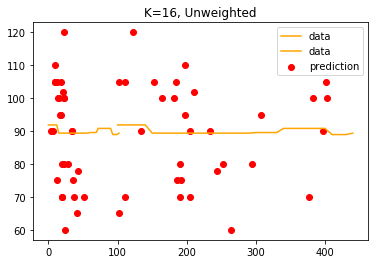

The unweighted accuracy is: -0.32 (+/- 0.52).


In [82]:
knn = neighbors.KNeighborsRegressor(n_neighbors=16)
X = np.array(tune[['duration','loudness']]) #Add the array to make the model better
Y = np.column_stack([tune.bpm,tune.bpm]) #http://www.michaeljgrogan.com/k-nearest-neighbors-classification-problems/ gave me this idea
knn.fit(X, Y)

Tx1 = np.arange(0, 105, 3)
Ty1 = np.arange(100, 450, 10)
T = np.column_stack([Tx1, Ty1])

Y_ = knn.predict(T)


plt.scatter(X, Y, c='red', label='prediction')

plt.plot(T, Y_, c='orange', label='data')
plt.legend()
plt.title('K=16, Unweighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("The unweighted accuracy is: %0.2f (+/- %0.2f)." % (score.mean(), score.std() * 2))

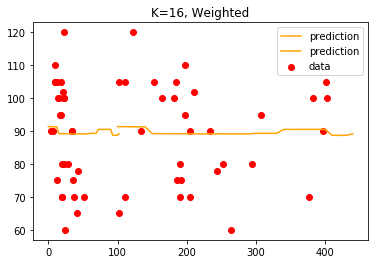

The weighted accuracy is: -0.23 (+/- 0.60).


In [155]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=16, weights='distance')
X = np.array(tune[['duration','loudness']]) #Added array to make the model better
knn_w.fit(X, Y)

# Set up our prediction line.
Tx1 = np.arange(0, 105, 3)
Ty1 = np.arange(100, 450, 10)
T = np.column_stack([Tx1, Ty1])

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='red', label='data')
plt.plot(T, Y_, c='orange', label='prediction')
plt.legend()
plt.title('K=16, Weighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("The weighted accuracy is: %0.2f (+/- %0.2f)." % (score_w.mean(), score_w.std() * 2))